In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Datasets

In [2]:
train = pd.read_csv('train_hr.csv')
test = pd.read_csv('test_hr.csv')
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null object
region                  23490 non-null object
education               22456 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    21678 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [5]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

# Checking null values in train & test

In [8]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [10]:
print(train.shape)
print(test.shape)

(54808, 14)
(23490, 13)


In [11]:
train[train.apply(lambda x:x.isnull().sum(),axis=1)!=0].count()

employee_id             6148
department              6148
region                  6148
education               3739
gender                  6148
recruitment_channel     6148
no_of_trainings         6148
age                     6148
previous_year_rating    2024
length_of_service       6148
KPIs_met >80%           6148
awards_won?             6148
avg_training_score      6148
is_promoted             6148
dtype: int64

In [12]:
test[test.apply(lambda x:x.isnull().sum(),axis=1)!=0].count()

employee_id             2671
department              2671
region                  2671
education               1637
gender                  2671
recruitment_channel     2671
no_of_trainings         2671
age                     2671
previous_year_rating     859
length_of_service       2671
KPIs_met >80%           2671
awards_won?             2671
avg_training_score      2671
dtype: int64

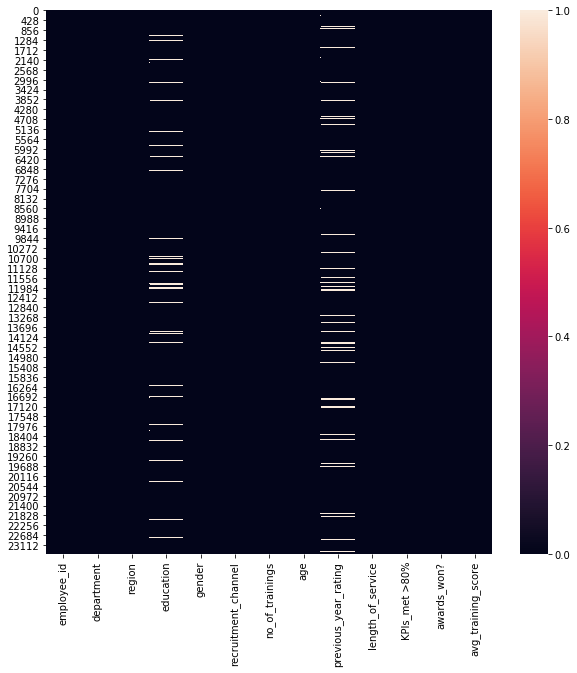

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(test.isnull())
plt.show()

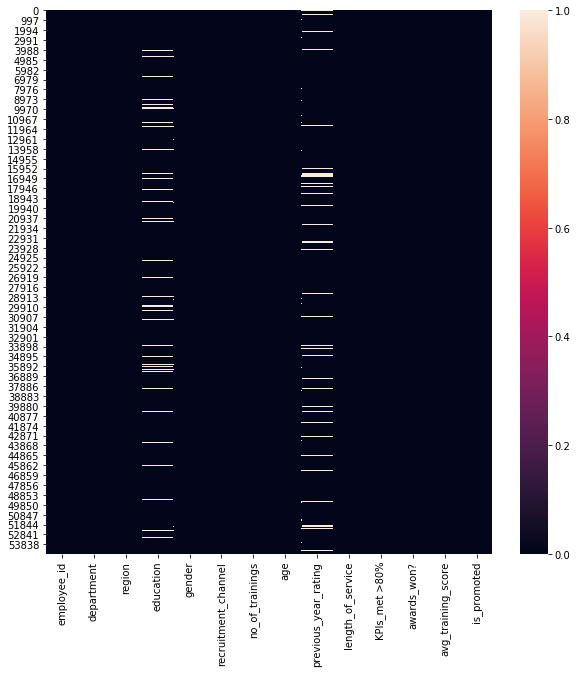

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull())
plt.show()

# Replacing null values

In [15]:
gen_train=train.groupby('gender')
ma_train=gen_train.get_group('m')
fe_train=gen_train.get_group('f')

In [16]:
g3_train=ma_train['education'].mode()
g4_train=fe_train['education'].mode()

In [17]:
g3_train

0    Bachelor's
dtype: object

In [18]:
g4_train

0    Bachelor's
dtype: object

In [19]:
train['education'].replace({np.nan:"Bachelor's"},inplace=True)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               54808 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [21]:
gen_test=test.groupby('gender')
ma_test=gen_test.get_group('m')
fe_test=gen_test.get_group('f')

In [22]:
g3_test=ma_test['education'].mode()
g4_test=fe_test['education'].mode()

In [23]:
g3_test

0    Bachelor's
dtype: object

In [24]:
g4_test

0    Bachelor's
dtype: object

In [25]:
test['education'].replace({np.nan:"Bachelor's"},inplace=True)

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null object
region                  23490 non-null object
education               23490 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    21678 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [27]:
train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [28]:
pre_train=train.groupby('department')
train_1=pre_train.get_group('Sales & Marketing')
train_2=pre_train.get_group('Operations')
train_3=pre_train.get_group('Technology')
train_4=pre_train.get_group('Analytics')
train_5=pre_train.get_group('Finance')
train_6=pre_train.get_group('HR')
train_7=pre_train.get_group('Legal')
train_8=pre_train.get_group('R&D')

In [29]:
g1_train=train_1['previous_year_rating'].mean()
g2_train=train_2['previous_year_rating'].mean()
g3_train=train_3['previous_year_rating'].mean()
g4_train=train_4['previous_year_rating'].mean()
g5_train=train_5['previous_year_rating'].mean()
g6_train=train_6['previous_year_rating'].mean()
g7_train=train_7['previous_year_rating'].mean()
g8_train=train_8['previous_year_rating'].mean()

In [30]:
print(g1_train)
print(g2_train)
print(g3_train)
print(g4_train)
print(g5_train)
print(g6_train)
print(g7_train)
print(g8_train)

3.0679374074312578
3.6321561338289965
3.1586771844660193
3.5573065902578795
3.5064358632933867
3.4829650092081033
3.4052812858783006
3.56359649122807


In [31]:
train['previous_year_rating'].mean()

3.329255780917055

In [32]:
train['previous_year_rating'].replace({np.nan:np.mean(train['previous_year_rating'])},inplace=True)

In [33]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [34]:
pre_test=test.groupby('department')
test_1=pre_test.get_group('Sales & Marketing')
test_2=pre_test.get_group('Operations')
test_3=pre_test.get_group('Technology')
test_4=pre_test.get_group('Analytics')
test_5=pre_test.get_group('Finance')
test_6=pre_test.get_group('HR')
test_7=pre_test.get_group('Legal')
test_8=pre_test.get_group('R&D')

In [35]:
g1_test=test_1['previous_year_rating'].mean()
g2_test=test_2['previous_year_rating'].mean()
g3_test=test_3['previous_year_rating'].mean()
g4_test=test_4['previous_year_rating'].mean()
g5_test=test_5['previous_year_rating'].mean()
g6_test=test_6['previous_year_rating'].mean()
g7_test=test_7['previous_year_rating'].mean()
g8_test=test_8['previous_year_rating'].mean()

In [36]:
print(g1_test)
print(g2_test)
print(g3_test)
print(g4_test)
print(g5_test)
print(g6_test)
print(g7_test)
print(g8_test)

3.090448517359559
3.657155496571555
3.1518438177874186
3.536468330134357
3.5364372469635628
3.5269582909460833
3.4545454545454546
3.661654135338346


In [37]:
test['previous_year_rating'].mean()

3.339145677645539

In [38]:
test['previous_year_rating'].replace({np.nan:np.mean(test['previous_year_rating'])},inplace=True)

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null object
region                  23490 non-null object
education               23490 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    23490 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [40]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

# EDA

# Heatmap

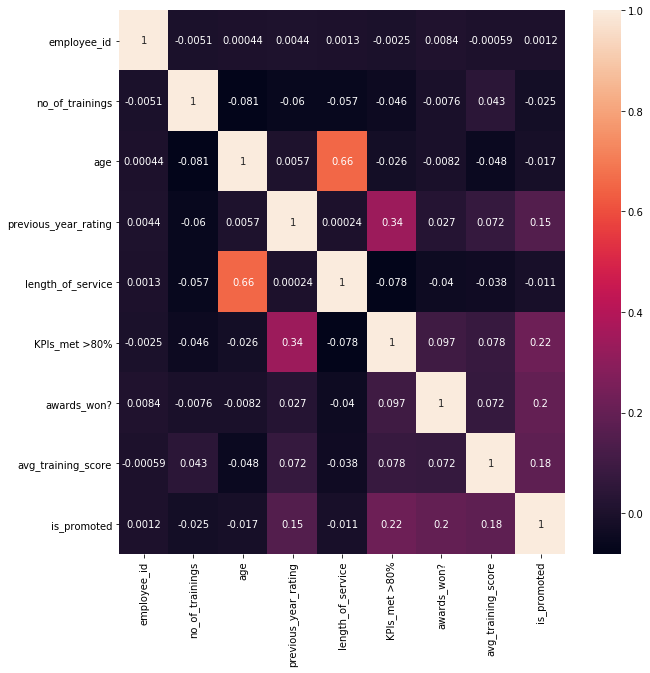

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)
plt.show()

# Here from the heatmap we can see that kpi ratings, awards won and previous year ratings are more correleated with the target variable than other variables

In [42]:
print(train.department.value_counts().sort_values(ascending=False))
print(train.region.value_counts().sort_values(ascending=False))
print(train.education.value_counts().sort_values(ascending=False))
print(train.recruitment_channel.value_counts().sort_values(ascending=False))

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64
Bachelor's          39078
Master's & above    14925
B

In [43]:
train['class']='train'
test['class']='test'

In [44]:
print(train.shape)
print(test.shape)

(54808, 15)
(23490, 14)


In [45]:
train_test=pd.concat([train,test])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [46]:
train_test.shape

(78298, 15)

In [47]:
D=pd.get_dummies(train_test,columns=['department','education','recruitment_channel','gender','region'],drop_first=True)

In [48]:
D.shape

(78298, 56)

In [49]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 56 columns):
KPIs_met >80%                   78298 non-null int64
age                             78298 non-null int64
avg_training_score              78298 non-null int64
awards_won?                     78298 non-null int64
class                           78298 non-null object
employee_id                     78298 non-null int64
is_promoted                     54808 non-null float64
length_of_service               78298 non-null int64
no_of_trainings                 78298 non-null int64
previous_year_rating            78298 non-null float64
department_Finance              78298 non-null uint8
department_HR                   78298 non-null uint8
department_Legal                78298 non-null uint8
department_Operations           78298 non-null uint8
department_Procurement          78298 non-null uint8
department_R&D                  78298 non-null uint8
department_Sales & Marketing    78298 

In [50]:
train=D[D['class']=='train']
test=D[D['class']=='test']

In [51]:
del train['class']

In [52]:
train.shape

(54808, 55)

In [53]:
del test['class']

In [54]:
test.shape

(23490, 55)

In [55]:
pd.value_counts(train['is_promoted'].values)

0.0    50140
1.0     4668
dtype: int64

In [56]:
test.drop('is_promoted',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [57]:
X=train.drop(['employee_id','is_promoted'],axis=1)
y=train['is_promoted']

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [59]:
print(X_train.shape)
print(X_test.shape)

(38365, 53)
(16443, 53)


In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [61]:
Xtrain_scaled=sc.fit_transform(X_train)
Xtest_scaled=sc.transform(X_test)

In [62]:
testid=test['employee_id']
Test=test.drop('employee_id',axis=1)

In [63]:
Test.shape

(23490, 53)

In [64]:
Test_scaled=sc.transform(Test)

# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [66]:
lr.fit(Xtrain_scaled,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
training_score=lr.score(Xtrain_scaled,y_train)
print(training_score)

0.9316564577088492


In [68]:
testing_score=lr.score(Xtest_scaled,y_test)
print(testing_score)

0.9323116219667944


In [69]:
y_pred=lr.predict(Xtest_scaled)

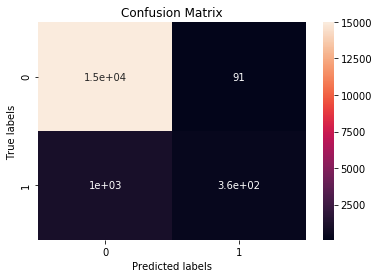

In [70]:
from sklearn.metrics import confusion_matrix
ax= plt.subplot()
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);
plt.show()

In [71]:
from sklearn.metrics import roc_curve,roc_auc_score

In [72]:
y_pred_proba=lr.predict_proba(Xtest_scaled)
y_pred_proba

array([[0.66483338, 0.33516662],
       [0.97171916, 0.02828084],
       [0.66435989, 0.33564011],
       ...,
       [0.9779039 , 0.0220961 ],
       [0.96357059, 0.03642941],
       [0.97754751, 0.02245249]])

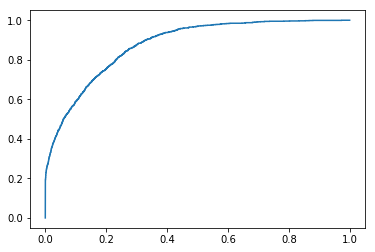

In [73]:
fpr,tpr,_=roc_curve(y_test,y_pred_proba[:,1])
plt.plot(fpr,tpr)

In [74]:
roc_auc_score(y_test,y_pred_proba[:,1])

0.8767285868888193

In [75]:
testid=test['employee_id']

In [76]:
Test=test.drop('employee_id',axis=1)

In [77]:
Test.shape

(23490, 53)

In [78]:
Test_scaled=sc.transform(Test)

In [79]:
Test_pred=lr.predict(Test_scaled)

In [ ]:
#testdf=pd.DataFrame({'employee_id':testid,'is_promoted':Test_pred})

In [ ]:
#testdf.info()

In [ ]:
#testdf['is_promoted']=testdf.is_promoted.astype(int)

In [317]:
#testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 0 to 23489
Data columns (total 2 columns):
employee_id    23490 non-null int64
is_promoted    23490 non-null int32
dtypes: int32(1), int64(1)
memory usage: 458.8 KB


In [318]:
#testdf.to_csv('lr.csv',index=False)

In [80]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,Xtrain_scaled)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.644810
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                38365
Model:                          Logit   Df Residuals:                    38312
Method:                           MLE   Df Model:                           52
Date:                Wed, 11 Dec 2019   Pseudo R-squ.:                  -1.207
Time:                        14:14:14   Log-Likelihood:                -24738.
converged:                       True   LL-Null:                       -11209.
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2269      0.012     19.580      0.000       0.204       0.250
x2            -0.0568      0.016     -3.601      0.000      -0.088      -0.026
x3             2.1895      0.050     44.009      0.000       2.092       2.287
x4             0.2010      0.014     13.929      0.000       0.173       0.229
x5             0.0305      0.014      2.136      0.033       0.003       0.059
x6            -0.0187      0.011     -1.698      0.090      -0.040       0.003
x7             0.0819      0.012      7.064      0.000       0.059       0.105
x8             0.8505      0.024     36.127      0.000       0.804       0.897
x9             1.1554      0.030     38.806      0.000       1.097       1.214
x10            0.5329      0.017     31.085      0.000       0.499       0.566
x11            1.6270      0.041     39.381      0.000       1.546       1.708
x12            0.8251      0.024     33.877      0.000       0.777       0.873
x13           -0.0215      0.012     -1.866      0.062      -0.044       0.001
x14            2.6281      0.063     41.988      0.000       2.505       2.751
x15            0.3039      0.017     17.947      0.000       0.271       0.337
x16           -0.0068      0.011     -0.609      0.542      -0.029       0.015
x17            0.0256      0.012      2.160      0.031       0.002       0.049
x18           -0.0016      0.011     -0.143      0.886      -0.023       0.020
x19            0.0037      0.011      0.341      0.733      -0.017       0.025
x20            0.0068      0.011      0.599      0.549      -0.015       0.029
x21            0.0100      0.015      0.655      0.513      -0.020       0.040
x22            0.0088      0.019      0.469      0.639      -0.028       0.046
x23            0.0081      0.015      0.556      0.579      -0.020       0.036
x24            0.0228      0.024      0.939      0.348      -0.025       0.070
x25            0.0064      0.016      0.389      0.697      -0.026       0.039
x26            0.0183      0.025      0.730      0.465      -0.031       0.067
x27            0.0081      0.020      0.410      0.682      -0.030       0.047
x28            0.0309      0.016      1.932      0.053      -0.000       0.062
x29           -0.0029      0.011     -0.266      0.790      -0.024       0.018
x30            0.0048      0.017      0.290      0.772      -0.028       0.038
x31            0.0465      0.044      1.050      0.294      -0.040       0.133
x32            0.0042      0.017      0.254      0.800      -0.028       0.037
x33            0.0003      0.014      0.021      0.983      -0.027       0.027
x34            0.0566      0.034      1.643      0.100      -0.011       0.124
x35            0.0281      0.018      1.533      0.125      -0.008       0.064
x36           -0.0008      0.015     -0.053      0.958      -0.029       0.028
x37            0.0267      0.016      1.643      0.100      -0.005       0.058
x38            0.0043      0.023      0.188      0.851      -0.040       0.049
x3

In [81]:
Xtrain_scaled.shape

(38365, 53)

In [82]:
traindf=pd.DataFrame(Xtrain_scaled)

In [83]:
traindf.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,1.356063,-0.757764,-0.852680,-0.154196,-1.140312,-0.413952,-0.001434,-0.224062,4.608750,-0.13859,...,-0.188987,-0.131075,-0.070548,-0.072208,-0.179844,-0.120934,-0.111607,3.216712,-0.108943,-0.087877
1,1.356063,1.202367,-1.226829,-0.154196,1.204951,-0.413952,1.375751,-0.224062,-0.216979,-0.13859,...,-0.188987,-0.131075,-0.070548,-0.072208,-0.179844,-0.120934,-0.111607,-0.310876,-0.108943,-0.087877
2,-0.737429,-0.627089,-1.002340,-0.154196,-0.671259,-0.413952,-0.272838,-0.224062,-0.216979,-0.13859,...,-0.188987,7.629236,-0.070548,-0.072208,-0.179844,-0.120934,-0.111607,-0.310876,-0.108943,-0.087877
3,1.356063,1.202367,0.868407,-0.154196,2.143057,-0.413952,1.375751,-0.224062,-0.216979,-0.13859,...,-0.188987,-0.131075,-0.070548,-0.072208,-0.179844,-0.120934,-0.111607,-0.310876,-0.108943,-0.087877
4,-0.737429,-0.104387,-0.179211,-0.154196,0.266846,-0.413952,-0.272838,-0.224062,-0.216979,-0.13859,...,-0.188987,-0.131075,-0.070548,-0.072208,-0.179844,-0.120934,-0.111607,3.216712,-0.108943,-0.087877


# DecisionTree

In [360]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3)
dt_model=dt.fit(Xtrain_scaled,y_train)

In [361]:
train_pred_dt= dt_model.predict(Xtrain_scaled)
test_pred_dt= dt_model.predict(Xtest_scaled)

In [362]:
confusion_matrix_test_dt = confusion_matrix(y_test,test_pred_dt)
confusion_matrix_train_dt = confusion_matrix(y_train,train_pred_dt)

print(confusion_matrix_test_dt)

print(confusion_matrix_train_dt)

[[15038    20]
 [ 1231   154]]
[[35044    38]
 [ 2929   354]]


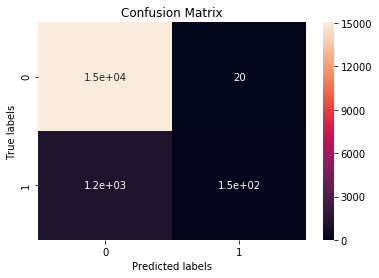

In [363]:
from sklearn.metrics import confusion_matrix
ax= plt.subplot()
labels = [0,1]
cm = confusion_matrix(y_test, test_pred_dt, labels)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);
plt.show()

In [364]:
accuracy_train_dt = (confusion_matrix_train_dt[0,0]+confusion_matrix_train_dt[1,1])/(confusion_matrix_train_dt[0,0]+confusion_matrix_train_dt[0,1]+confusion_matrix_train_dt[1,0]+confusion_matrix_train_dt[1,1])

tnr_train_dt = confusion_matrix_train_dt[0,0]/(confusion_matrix_train_dt[0,0]+confusion_matrix_train_dt[0,1])

tpr_train_dt = confusion_matrix_train_dt[1,1]/(confusion_matrix_train_dt[1,0]+confusion_matrix_train_dt[1,1])

print('TNR_train',tnr_train_dt)
print('TPR_train',tpr_train_dt)
print('Training_Accuracy',accuracy_train_dt)

TNR_train 0.9989168234422211
TPR_train 0.10782820590922937
Training_Accuracy 0.9226638863547504


In [365]:
accuracy_test_dt = (confusion_matrix_test_dt[0,0]+confusion_matrix_test_dt[1,1])/(confusion_matrix_test_dt[0,0]+confusion_matrix_test_dt[0,1]+confusion_matrix_test_dt[1,0]+confusion_matrix_test_dt[1,1])

tnr_test_dt = confusion_matrix_test_dt[0,0]/(confusion_matrix_test_dt[0,0]+confusion_matrix_test_dt[0,1])

tpr_test_dt = confusion_matrix_test_dt[1,1]/(confusion_matrix_test_dt[1,0]+confusion_matrix_test_dt[1,1])

print('TNR_test',tnr_test_dt)
print('TPR_test',tpr_test_dt)
print('Test_Accuracy',accuracy_test_dt)

TNR_test 0.9986718023641918
TPR_test 0.1111913357400722
Test_Accuracy 0.9239189928845101


In [366]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,auc
print(classification_report(y_test,test_pred_dt))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     15058
         1.0       0.89      0.11      0.20      1385

   micro avg       0.92      0.92      0.92     16443
   macro avg       0.90      0.55      0.58     16443
weighted avg       0.92      0.92      0.90     16443



In [367]:
train_pred_prob_dt = dt_model.predict_proba(Xtrain_scaled)

In [368]:
train_pred_prob_dt = train_pred_prob_dt[:,1]

train_pred_prob_dt

array([0.15347063, 0.15347063, 0.02959476, ..., 0.15347063, 0.15347063,
       0.02959476])

In [369]:
test_pred_prob_dt = dt_model.predict_proba(Xtest_scaled)

test_pred_prob_dt = test_pred_prob_dt[:,1]

test_pred_prob_dt

array([0.15347063, 0.15347063, 0.15347063, ..., 0.02959476, 0.15347063,
       0.02959476])

In [370]:
fpr,tpr,thresholds= roc_curve(y_train,train_pred_prob_dt)
roc_auc_dt_train = auc(fpr,tpr)

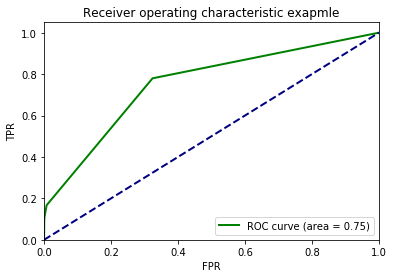

In [371]:
plt.figure()
lw=2
plt.plot(fpr,tpr,color = 'green',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc_dt_train)
plt.plot([0,1],[0,1],color = 'navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver operating characteristic exapmle")
plt.legend(loc='lower right')
plt.show()

In [372]:
fpr,tpr,thresholds= roc_curve(y_test,test_pred_prob_dt)
roc_auc_dt_test = auc(fpr,tpr)

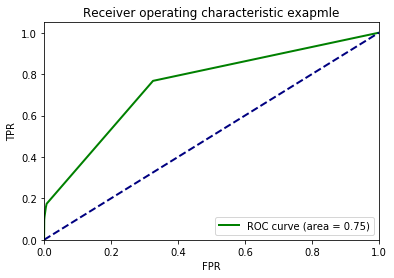

In [373]:
plt.figure()
lw=2
plt.plot(fpr,tpr,color = 'green',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc_dt_test)
plt.plot([0,1],[0,1],color = 'navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver operating characteristic exapmle")
plt.legend(loc='lower right')
plt.show()

In [342]:
Test_pred_dt=dt.predict(Test_scaled)

testdf_dt=pd.DataFrame({'employee_id':testid,'is_promoted':Test_pred_dt})

testdf_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 0 to 23489
Data columns (total 2 columns):
employee_id    23490 non-null int64
is_promoted    23490 non-null float64
dtypes: float64(1), int64(1)
memory usage: 550.5 KB


In [343]:
testdf_dt['is_promoted']=testdf_dt.is_promoted.astype(int)

testdf_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 0 to 23489
Data columns (total 2 columns):
employee_id    23490 non-null int64
is_promoted    23490 non-null int32
dtypes: int32(1), int64(1)
memory usage: 458.8 KB


In [344]:
testdf_dt.to_csv('dt.csv',index=False)

# KNN

In [345]:
from sklearn.neighbors import KNeighborsClassifier

In [346]:
knn=KNeighborsClassifier()

In [347]:
param_grids_knn={'n_neighbors':[3,5,7],'metric':['euclidean','manhattan','minkowski']}

# GRADIENT BOOSTING

In [349]:
from sklearn.ensemble import GradientBoostingClassifier
gradient=GradientBoostingClassifier(n_estimators=100,learning_rate=0.01)
gradient_model=gradient.fit(Xtrain_scaled,y_train)

In [350]:
train_pred_gd = gradient_model.predict(Xtrain_scaled)
test_pred_gd = gradient_model.predict(Xtest_scaled)

In [351]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,test_pred_gd))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     15058
         1.0       0.95      0.10      0.19      1385

   micro avg       0.92      0.92      0.92     16443
   macro avg       0.94      0.55      0.57     16443
weighted avg       0.93      0.92      0.89     16443



In [352]:
confusion_matrix_test_gd = confusion_matrix(y_test,test_pred_gd)
confusion_matrix_train_gd= confusion_matrix(y_train,train_pred_gd)

In [353]:
accuracy_train_gd= (confusion_matrix_train_gd[0,0]+confusion_matrix_train_gd[1,1])/confusion_matrix_train_gd.sum()
tnr_train_gd= confusion_matrix_train_gd[0,0]/(confusion_matrix_train_gd[0,0]+confusion_matrix_train_gd[0,1])
tpr_train_gd= confusion_matrix_train_gd[1,1]/(confusion_matrix_train_gd[1,0]+confusion_matrix_train_gd[1,1])

print('Train Accuracy =', accuracy_train_gd)
print('Train TNR =', tnr_train_gd)
print('Train TPR =', tpr_train_gd)

accuracy_test_gd= (confusion_matrix_test_gd[0,0]+confusion_matrix_test_gd[1,1])/confusion_matrix_test_gd.sum()
tnr_test_gd= confusion_matrix_test_gd[0,0]/(confusion_matrix_test_gd[0,0]+confusion_matrix_test_gd[0,1])
tpr_test_gd= confusion_matrix_test_gd[1,1]/(confusion_matrix_test_gd[1,0]+confusion_matrix_test_gd[1,1])

print('\nTest Accuracy =', accuracy_test_gd)
print('Test TNR =', tnr_test_gd)
print('Test TPR =', tpr_test_gd)

Train Accuracy = 0.9228463443242538
Train TNR = 0.9995439256598826
Train TPR = 0.10325921413341456

Test Accuracy = 0.9239798090372803
Test TNR = 0.9995351308274671
Test TPR = 0.10252707581227437


In [354]:
test_pred_prob_gd = gradient_model.predict_proba(Xtest_scaled)
test_pred_prob_gd = test_pred_prob_gd[:,1]

fpr_gd,tpr_gd,thresh_gd = roc_curve(y_test,test_pred_prob_gd)
roc_auc_gd = auc(fpr_gd, tpr_gd)
print('ROC Area under curve =', roc_auc_gd)

ROC Area under curve = 0.8097550122678472


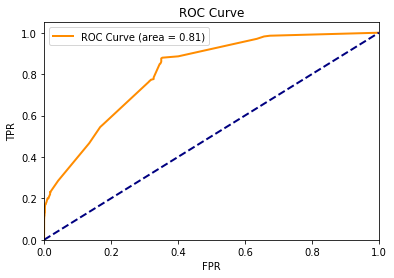

In [356]:
plt.figure()
lw = 2
plt.plot(fpr_gd,tpr_gd,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc_gd)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [357]:
Test_pred_gd=gradient_model.predict(Test_scaled)

testdf_gd=pd.DataFrame({'employee_id':testid,'is_promoted':Test_pred_gd})

testdf_gd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 0 to 23489
Data columns (total 2 columns):
employee_id    23490 non-null int64
is_promoted    23490 non-null float64
dtypes: float64(1), int64(1)
memory usage: 550.5 KB


In [358]:
testdf_gd['is_promoted']=testdf_gd.is_promoted.astype(int)

testdf_gd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 0 to 23489
Data columns (total 2 columns):
employee_id    23490 non-null int64
is_promoted    23490 non-null int32
dtypes: int32(1), int64(1)
memory usage: 458.8 KB


In [359]:
testdf_gd.to_csv('gd.csv',index=False)

# Adaboosting

In [374]:
from sklearn.ensemble import AdaBoostClassifier
model=DecisionTreeClassifier()
Adaboost=AdaBoostClassifier(base_estimator=model,n_estimators=100,learning_rate=1)
model2=Adaboost.fit(Xtrain_scaled,y_train)


In [375]:
train_pred_ad = model2.predict(Xtrain_scaled)
test_pred_ad = model2.predict(Xtest_scaled)

In [376]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,test_pred_ad))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     15058
         1.0       0.61      0.35      0.45      1385

   micro avg       0.93      0.93      0.93     16443
   macro avg       0.78      0.66      0.70     16443
weighted avg       0.91      0.93      0.92     16443



In [377]:
test_pred_prob_ad = model2.predict_proba(Xtest_scaled)
test_pred_prob_ad = test_pred_prob_ad[:,1]

fpr_ad,tpr_ad,thresh_ad = roc_curve(y_test,test_pred_prob_ad)
roc_auc_ad = auc(fpr_ad, tpr_ad)
print('ROC Area under curve =', roc_auc_ad)

ROC Area under curve = 0.760406332577811


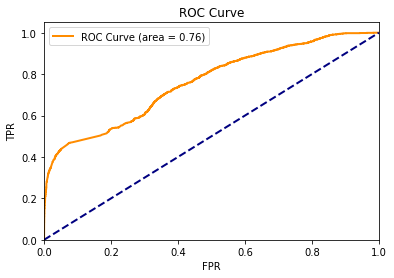

In [379]:
plt.figure()
lw = 2
plt.plot(fpr_ad,tpr_ad,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc_ad)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [380]:
Test_pred_ad=model2.predict(Test_scaled)

testdf_ad=pd.DataFrame({'employee_id':testid,'is_promoted':Test_pred_ad})

testdf_ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 0 to 23489
Data columns (total 2 columns):
employee_id    23490 non-null int64
is_promoted    23490 non-null float64
dtypes: float64(1), int64(1)
memory usage: 550.5 KB


In [381]:
testdf_ad['is_promoted']=testdf_ad.is_promoted.astype(int)

testdf_ad.info()

testdf_ad.to_csv('ad.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 0 to 23489
Data columns (total 2 columns):
employee_id    23490 non-null int64
is_promoted    23490 non-null int32
dtypes: int32(1), int64(1)
memory usage: 458.8 KB


# Gaussian NB

In [387]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(Xtrain_scaled,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [388]:
train_pred_N = model.predict(Xtrain_scaled)
test_pred_N = model.predict(Xtest_scaled)

In [389]:
print(classification_report(y_test,test_pred_N))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     15058
         1.0       0.30      0.19      0.24      1385

   micro avg       0.89      0.89      0.89     16443
   macro avg       0.62      0.58      0.59     16443
weighted avg       0.88      0.89      0.88     16443



In [390]:
confusion_matrix_test_N = confusion_matrix(y_test,test_pred_N)
confusion_matrix_train_N= confusion_matrix(y_train,train_pred_N)

accuracy_train_N= (confusion_matrix_train_N[0,0]+confusion_matrix_train_N[1,1])/confusion_matrix_train_N.sum()
tnr_train_N= confusion_matrix_train_N[0,0]/(confusion_matrix_train_N[0,0]+confusion_matrix_train_N[0,1])
tpr_train_N= confusion_matrix_train_N[1,1]/(confusion_matrix_train_N[1,0]+confusion_matrix_train_N[1,1])

print('Train Accuracy =', accuracy_train_N)
print('Train TNR =', tnr_train_N)
print('Train TPR =', tpr_train_N)

accuracy_test_N= (confusion_matrix_test_N[0,0]+confusion_matrix_test_N[1,1])/confusion_matrix_test_N.sum()
tnr_test_N= confusion_matrix_test_N[0,0]/(confusion_matrix_test_N[0,0]+confusion_matrix_test_N[0,1])
tpr_test_N= confusion_matrix_test_N[1,1]/(confusion_matrix_test_N[1,0]+confusion_matrix_test_N[1,1])

print('\nTest Accuracy =', accuracy_test_N)
print('Test TNR =', tnr_test_N)
print('Test TPR =', tpr_test_N)

Train Accuracy = 0.8935488075068422
Train TNR = 0.9578986374779089
Train TPR = 0.20590922936338715

Test Accuracy = 0.8943623426382047
Test TNR = 0.9586930535263647
Test TPR = 0.19494584837545126


In [391]:
test_pred_prob_N = model.predict_proba(Xtest_scaled)
test_pred_prob_N = test_pred_prob_N[:,1]

fpr_N,tpr_N,thresh_N = roc_curve(y_test,test_pred_prob_N)
roc_auc_N = auc(fpr_N, tpr_N)
print('ROC Area under curve =', roc_auc_N)

ROC Area under curve = 0.7477046874827681


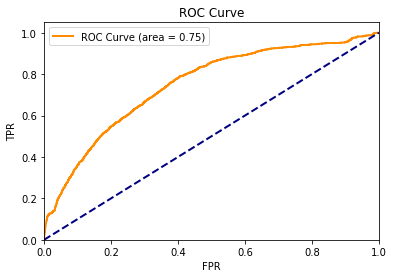

In [392]:
plt.figure()
lw = 2
plt.plot(fpr_N,tpr_N,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc_N)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [393]:
Test_pred_N=model.predict(Test_scaled)

testdf_N=pd.DataFrame({'employee_id':testid,'is_promoted':Test_pred_N})

testdf_N.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 0 to 23489
Data columns (total 2 columns):
employee_id    23490 non-null int64
is_promoted    23490 non-null float64
dtypes: float64(1), int64(1)
memory usage: 550.5 KB


In [394]:
testdf_N['is_promoted']=testdf_N.is_promoted.astype(int)

testdf_N.info()

testdf_N.to_csv('N.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 0 to 23489
Data columns (total 2 columns):
employee_id    23490 non-null int64
is_promoted    23490 non-null int32
dtypes: int32(1), int64(1)
memory usage: 458.8 KB


# LIGHT GBM

In [288]:
import lightgbm as LGBM
from lightgbm import LGBMClassifier

In [289]:
lgbm=LGBMClassifier()
lgbm.fit(Xtrain_scaled,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [290]:
train_pred_lgbm = lgbm.predict(Xtrain_scaled)
test_pred_lgbm = lgbm.predict(Xtest_scaled)

In [308]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,auc,roc_curve
print(classification_report(y_test,test_pred_lgbm))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     15058
         1.0       0.94      0.36      0.52      1385

   micro avg       0.94      0.94      0.94     16443
   macro avg       0.94      0.68      0.74     16443
weighted avg       0.94      0.94      0.93     16443



In [309]:
confusion_matrix_test_lgbm = confusion_matrix(y_test,test_pred_lgbm)
confusion_matrix_train_lgbm = confusion_matrix(y_train,train_pred_lgbm)

In [310]:
accuracy_train_lgbm= (confusion_matrix_train_lgbm[0,0]+confusion_matrix_train_lgbm[1,1])/confusion_matrix_train_lgbm.sum()
tnr_train_lgbm= confusion_matrix_train_lgbm[0,0]/(confusion_matrix_train_lgbm[0,0]+confusion_matrix_train_lgbm[0,1])
tpr_train_lgbm= confusion_matrix_train_lgbm[1,1]/(confusion_matrix_train_lgbm[1,0]+confusion_matrix_train_lgbm[1,1])

In [311]:
print('Train Accuracy =', accuracy_train_lgbm)
print('Train TNR =', tnr_train_lgbm)
print('Train TPR =', tpr_train_lgbm)

Train Accuracy = 0.9439332725140102
Train TNR = 0.9990023373809931
Train TPR = 0.3554675601583917


In [312]:
accuracy_test_lgbm= (confusion_matrix_test_lgbm[0,0]+confusion_matrix_test_lgbm[1,1])/confusion_matrix_test_lgbm.sum()
tnr_test_lgbm= confusion_matrix_test_lgbm[0,0]/(confusion_matrix_test_lgbm[0,0]+confusion_matrix_test_lgbm[0,1])
tpr_test_lgbm= confusion_matrix_test_lgbm[1,1]/(confusion_matrix_test_lgbm[1,0]+confusion_matrix_test_lgbm[1,1])

In [313]:
print('\nTest Accuracy =', accuracy_test_lgbm)
print('Test TNR =', tnr_test_lgbm)
print('Test TPR =', tpr_test_lgbm)


Test Accuracy = 0.9439883232986681
Test TNR = 0.9980741134280781
Test TPR = 0.355956678700361


In [314]:
test_pred_prob_lgbm = lgbm.predict_proba(Xtest_scaled)
test_pred_prob_lgbm = test_pred_prob_lgbm[:,1]

In [315]:
fpr_lgbm,tpr_lgbm,thresh_lgbm = roc_curve(y_test,test_pred_prob_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)
print('ROC Area under curve =', roc_auc_lgbm)

ROC Area under curve = 0.9124057495134338


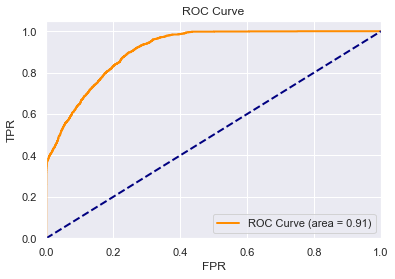

In [322]:
plt.figure()
lw = 2
plt.plot(fpr_lgbm,tpr_lgbm,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc_lgbm)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [318]:
Test_pred_lgbm=lgbm.predict(Test_scaled)

testdf_lgbm=pd.DataFrame({'employee_id':testid,'is_promoted':Test_pred_lgbm})

In [319]:
testdf_lgbm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 0 to 23489
Data columns (total 2 columns):
employee_id    23490 non-null int64
is_promoted    23490 non-null float64
dtypes: float64(1), int64(1)
memory usage: 550.5 KB


In [320]:
testdf_lgbm['is_promoted']=testdf_lgbm.is_promoted.astype(int)

In [321]:
testdf_lgbm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 0 to 23489
Data columns (total 2 columns):
employee_id    23490 non-null int64
is_promoted    23490 non-null int32
dtypes: int32(1), int64(1)
memory usage: 458.8 KB


In [323]:
testdf_lgbm.to_csv('lgbm.csv',index=False)

In [324]:
lgbm=LGBMClassifier()
lgbm.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [325]:
train_pred_lgbm1 = lgbm.predict(X_train)
test_pred_lgbm1 = lgbm.predict(X_test)

In [326]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,auc,roc_curve
print(classification_report(y_test,test_pred_lgbm1))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     15058
         1.0       0.94      0.36      0.52      1385

   micro avg       0.94      0.94      0.94     16443
   macro avg       0.94      0.68      0.74     16443
weighted avg       0.94      0.94      0.93     16443



In [327]:
confusion_matrix_test_lgbm1 = confusion_matrix(y_test,test_pred_lgbm1)
confusion_matrix_train_lgbm1 = confusion_matrix(y_train,train_pred_lgbm1)

accuracy_train_lgbm1= (confusion_matrix_train_lgbm1[0,0]+confusion_matrix_train_lgbm1[1,1])/confusion_matrix_train_lgbm1.sum()
tnr_train_lgbm1= confusion_matrix_train_lgbm1[0,0]/(confusion_matrix_train_lgbm1[0,0]+confusion_matrix_train_lgbm1[0,1])
tpr_train_lgbm1= confusion_matrix_train_lgbm1[1,1]/(confusion_matrix_train_lgbm1[1,0]+confusion_matrix_train_lgbm1[1,1])

print('Train Accuracy =', accuracy_train_lgbm1)
print('Train TNR =', tnr_train_lgbm1)
print('Train TPR =', tpr_train_lgbm1)

Train Accuracy = 0.9439332725140102
Train TNR = 0.9990023373809931
Train TPR = 0.3554675601583917


In [328]:
accuracy_test_lgbm1= (confusion_matrix_test_lgbm1[0,0]+confusion_matrix_test_lgbm1[1,1])/confusion_matrix_test_lgbm1.sum()
tnr_test_lgbm1= confusion_matrix_test_lgbm1[0,0]/(confusion_matrix_test_lgbm1[0,0]+confusion_matrix_test_lgbm1[0,1])
tpr_test_lgbm1= confusion_matrix_test_lgbm1[1,1]/(confusion_matrix_test_lgbm1[1,0]+confusion_matrix_test_lgbm1[1,1])

print('\nTest Accuracy =', accuracy_test_lgbm1)
print('Test TNR =', tnr_test_lgbm1)
print('Test TPR =', tpr_test_lgbm1)


Test Accuracy = 0.9439883232986681
Test TNR = 0.9980741134280781
Test TPR = 0.355956678700361


In [330]:
test_pred_prob_lgbm1 = lgbm.predict_proba(X_test)
test_pred_prob_lgbm1 = test_pred_prob_lgbm1[:,1]

In [331]:
fpr_lgbm1,tpr_lgbm1,thresh_lgbm1 = roc_curve(y_test,test_pred_prob_lgbm1)
roc_auc_lgbm1 = auc(fpr_lgbm1, tpr_lgbm1)
print('ROC Area under curve =', roc_auc_lgbm1)

ROC Area under curve = 0.9124057495134338


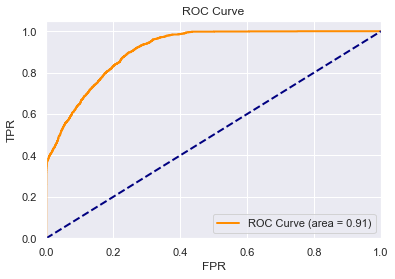

In [332]:
plt.figure()
lw = 2
plt.plot(fpr_lgbm1,tpr_lgbm1,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc_lgbm1)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [333]:
Test_pred_lgbm1=lgbm.predict(Test)

testdf_lgbm1=pd.DataFrame({'employee_id':testid,'is_promoted':Test_pred_lgbm1})

In [334]:
testdf_lgbm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 0 to 23489
Data columns (total 2 columns):
employee_id    23490 non-null int64
is_promoted    23490 non-null float64
dtypes: float64(1), int64(1)
memory usage: 550.5 KB


In [335]:
testdf_lgbm1['is_promoted']=testdf_lgbm1.is_promoted.astype(int)

In [336]:
testdf_lgbm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 0 to 23489
Data columns (total 2 columns):
employee_id    23490 non-null int64
is_promoted    23490 non-null int32
dtypes: int32(1), int64(1)
memory usage: 458.8 KB


In [337]:
testdf_lgbm.to_csv('lgbm1.csv',index=False)